In [ ]:
from PYME.LMVis import VisGUI

%gui wx

In [ ]:
pymevis = VisGUI.ipython_pymevisualize()
pipeline = pymevis.pipeline

In [1]:
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt

#Parameters to change
savedir = 'K:\\4Pi_data\\Oligomer_analysis\\Oligomer_analysis_V2\\updated_analysis_20230111\\analysis'
nbins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160 ,170, 180]
save_loc = "K:\\4Pi_data\\Oligomer_analysis\\Oligomer_analysis_V2\\updated_analysis_20230111"
# data = save_loc + '\\cluster_output_V1.npy'
# circ = save_loc + '\\circular_sims_V1.npy'
# line = save_loc + '\\linear_sims_V1.npy'
data = save_loc + '\\cluster_output_test_data.npy'
circ = save_loc + '\\circular_sims_test_data.npy'
line = save_loc + '\\linear_sims_test_data.npy'
ver = 'V1'
min_size = 10      # currently not used
max_size = 100     # currently not used
sim_num = 50 # number of simulated random orientations for each cluster. Must be the same as what
             # was used when creating the simulations

# Import data
real = np.load(data, allow_pickle=True)
#real = output.item()
circ_sim = np.load(circ, allow_pickle=True)
circ_sim = circ_sim.item()
line_sim = np.load(line, allow_pickle=True)
line_sim = line_sim.item()

In [2]:
for a in range(len(real)):
    if a == 0:
        alpha = real[a]['alpha']
        sim_alpha = real[a]['sim_alpha']
        count = real[a]['count']
    else:
        np.concatenate(alpha,real[a]['alpha'])
        np.concatenate(sim_alpha, real[a]['sim_alpha'])
        np.concatenate(count, real[a]['count'])

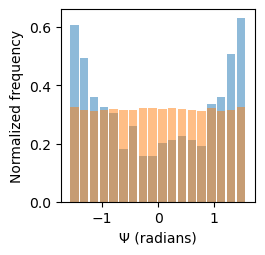

In [9]:
min_size_filt = count > min_size
max_size_filt = count < max_size
size_filt = min_size_filt * max_size_filt
sim_size_filt = np.repeat(size_filt, sim_num)

fig = plt.figure(figsize=[2.5,2.5])
plt.hist(alpha[size_filt],bins=18,width=0.15,density=True,alpha=0.5,range=((-np.pi/2),np.pi/2))
plt.hist(sim_alpha[sim_size_filt],bins=18,width=0.15,density=True,alpha=0.5,range=((-np.pi/2),np.pi/2))
plt.xlabel(u'\u03A8 (radians)')
plt.ylabel('Normalized frequency')
plt.show()
psi_save = savedir + '\\psi_histogram_' + ver + '.png'
plt.savefig(psi_save, dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)

In [4]:
sum(min_size_filt)

558

In [5]:
len(alpha)

797